##### Loading Header Files

In [1]:
import matplotlib.pyplot as plt
from matplotlib.backend_bases import RendererBase
from scipy import signal
from scipy.io import wavfile
#import soundfile as sf
import os
import numpy as np
from PIL import Image
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import torch.onnx

%matplotlib inline

### Function to Create a List to store all the Filenames
### under each folder

In [2]:
def file_search(dirname, ret, audio_file, list_avoid_dir=[]):
    filenames = os.listdir(dirname)

    for filename in filenames:
        full_filename = os.path.join(dirname, filename)
        audio_name = filename

        if os.path.isdir(full_filename) :
            if full_filename.split('/')[-1] in list_avoid_dir:
                continue
            else:
                file_search(full_filename, ret, list_avoid_dir)

        else:
            ret.append( full_filename )
            audio_file.append(audio_name)

##### Printing number of files under each folder

In [3]:
list_files = []

##storing only the names of the audio file
audio_file = []
for x in range(24):

    ##converting the iteration to string
    check_iter = str(x)

    if x == 9:
      sess_name = 'Actor_' + str(x+1)
    elif len(check_iter) == 1:
        sess_name = 'Actor_0' + str(x+1)
    else:
        sess_name = 'Actor_' + str(x+1)
    #path = r'9444_WeightDancers_projarchive//'+ sess_name + '//'
    path = r"C:/Users/User/9444_WeightDancers_proj/archive/" + sess_name + '/'
    file_search(path, list_files, audio_file)
    list_files = sorted(list_files)
    print (sess_name + ", #sum files: " + str(len(list_files)))

Actor_01, #sum files: 60
Actor_02, #sum files: 120
Actor_03, #sum files: 180
Actor_04, #sum files: 240
Actor_05, #sum files: 300
Actor_06, #sum files: 360
Actor_07, #sum files: 420
Actor_08, #sum files: 480
Actor_09, #sum files: 540
Actor_10, #sum files: 600
Actor_11, #sum files: 660
Actor_12, #sum files: 720
Actor_13, #sum files: 780
Actor_14, #sum files: 840
Actor_15, #sum files: 900
Actor_16, #sum files: 960
Actor_17, #sum files: 1020
Actor_18, #sum files: 1080
Actor_19, #sum files: 1140
Actor_20, #sum files: 1200
Actor_21, #sum files: 1260
Actor_22, #sum files: 1320
Actor_23, #sum files: 1380
Actor_24, #sum files: 1440


In [4]:
len(list_files)###total number of files in the directory

1440

###### Creating the Dataset.
Here during assigning of emotion classes, like '01' for 'neutral', we assigned '0' for neutralthat means for each class number, we subtracted 1 from it, because convolution neural networks start classifying classes labelled from '0'.Therefore our 7 classes are '0','1','2','3','4','5','6','7'

In [5]:
emotion_class = []
for everyfile in list_files:
  if (everyfile.split('/')[-1].strip('.wav')):
    ##getting the actual audio file name
    filename = everyfile.split('/')[-1].strip('.wav')

    audio_file = filename.split('-')

    ##getting the emotion class
    label = audio_file[2]

    ##making the class labels as either '0', '1', '2', '3', '4', '5', '6', '7'
    number_label = int(label) - 1

    emotion_class.append(number_label)

###### Printing the Class labels

In [6]:
emotion_class###printing of the 'emotion_class' labels

[0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,


In [7]:
data = []

for filenames, labels in zip(list_files, emotion_class):
  data.append({"path": filenames, "emotion_id": labels})

In [8]:
import pandas as pd

final_dataframe = pd.DataFrame(data)

###### Final Dataset

In [9]:
final_dataframe

,path,emotion_id
0,C:/Users/User/9444_WeightDancers_proj/archive/...,0
1,C:/Users/User/9444_WeightDancers_proj/archive/...,0
2,C:/Users/User/9444_WeightDancers_proj/archive/...,0
3,C:/Users/User/9444_WeightDancers_proj/archive/...,0
4,C:/Users/User/9444_WeightDancers_proj/archive/...,1
...,...,...
1435,C:/Users/User/9444_WeightDancers_proj/archive/...,7
1436,C:/Users/User/9444_WeightDancers_proj/archive/...,7
1437,C:/Users/User/9444_WeightDancers_proj/archive/...,7
1438,C:/Users/User/9444_WeightDancers_proj/archive/...,7


In [10]:
import math, random
import torch
import torchaudio
from torchaudio import transforms
from IPython.display import Audio

###### Preprocessing of Audio File Starts. Preprocessing code has been copied from https://ketanhdoshi.github.io/Audio-Classification/

#### Preprocessing Steps:-
(1)First, we converted all the audio files to have the same Sample Rates,  in our case, we converted each audio signal to have a sample rate of 44100 KHz.

(2) In the second step of preprocessing, we have audio samples (some have no. of channels = 1 or no. of channels =2), so we need to convert all the audio samples to ensure that all the samples have 2 channels. If the channel is mono, we duplicated another signal and concatenated it to construct a bi-channel.

(3) Resizing the signals to the same time length, we set a uniform length (here the length of signals is measured in ‘ms (milliseconds)’ i.e. we want signals to have the same time length of 4,000 ms. If the length of the signal is > 4000ms, we truncated; else if the signal is short we padded the time length with 0's.

(4)Preprocessing Step 5:Giving a time shift = 0.4secs; to each of the audio files for data augmentation purpose

(5)‘tranfroms.melsprctrogram’ method has been used to extract mel-spectrogram from a signal.The number of mel-spectrogram bands were configured to 64 and the window length for sampling each signal was set 1024.

In [11]:
class AudioUtil():
  # ----------------------------
  # Load an audio file. Return the signal as a tensor and the sample rate
  # ----------------------------
  
   #### Preprocessing Step 1: Function that returns the signal along with the Sample Rate
  def open(audio_file):
    sig, sr = torchaudio.load(audio_file)
    return (sig, sr)



  # ----------------------------
  # Convert the given audio to the desired number of channels
  # ----------------------------
  ###Preprocessing Step 2: Converting the sudio files so that they have same number of channels
  def rechannel(aud, new_channel):
    sig, sr = aud

    if (sig.shape[0] == new_channel):
      # Nothing to do
      return aud

    if (new_channel == 1):
      # Convert from stereo to mono by selecting only the first channel
      resig = sig[:1, :]
    else:
      # Convert from mono to stereo by duplicating the first channel
      resig = torch.cat([sig, sig])

    return ((resig, sr))

  ##same sample rates for each audio signal
  ### Preprocessing Step 3: Converting the audio files to have same number of samples
  def resample(aud, newsr):
    sig, sr = aud

    if (sr == newsr):
      # Nothing to do
      return aud

    num_channels = sig.shape[0]
    # Resample first channel
    resig = torchaudio.transforms.Resample(sr, newsr)(sig[:1,:])
    if (num_channels > 1):
      # Resample the second channel and merge both channels
      retwo = torchaudio.transforms.Resample(sr, newsr)(sig[1:,:])
      resig = torch.cat([resig, retwo])

    return ((resig, newsr))

  ##resizing signals to the same length
  ##Preprocessing Step 4: Converting all the audio files to the Same time length
  def pad_trunc(aud, max_ms):
    sig, sr = aud
    num_rows, sig_len = sig.shape
    max_len = sr//1000 * max_ms

    if (sig_len > max_len):
      # Truncate the signal to the given length
      sig = sig[:,:max_len]

    elif (sig_len < max_len):
      # Length of padding to add at the beginning and end of the signal
      pad_begin_len = random.randint(0, max_len - sig_len)
      pad_end_len = max_len - sig_len - pad_begin_len

      # Pad with 0s
      pad_begin = torch.zeros((num_rows, pad_begin_len))
      pad_end = torch.zeros((num_rows, pad_end_len))

      sig = torch.cat((pad_begin, sig, pad_end), 1)

    return (sig, sr)

  ###performing data augmentation by time shifting of audio signals
  ###Preprocessing Step 5:Giving a time shift to each of the audio files for data augmentation purpose
  def time_shift(aud, shift_limit):
    sig,sr = aud
    _, sig_len = sig.shape
    shift_amt = int(random.random() * shift_limit * sig_len)
    return (sig.roll(shift_amt), sr)

  # ----------------------------
  # Generate a Spectrogram
  # ----------------------------
  ##Precprocessing Step 6: Extracting melspectrogram feature from an audio signal
  def spectro_gram(aud, n_mels=64, n_fft=40, hop_len=20):
    sig,sr = aud
    top_db = 80

    # spec has shape [channel, n_mels, time], where channel is mono, stereo etc
    spec = transforms.MelSpectrogram(sr, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)(sig)

    # Convert to decibels
    spec = transforms.AmplitudeToDB(top_db=top_db)(spec)
    return (spec)

In [12]:
from torch.utils.data import DataLoader, Dataset, random_split
import torchaudio

###### Driver Functions For Preprocessing

In [13]:
# ----------------------------
# Sound Dataset
# ----------------------------
class SoundDS(Dataset):
  def __init__(self, df, data_path):
    self.df = df
    self.data_path = str(data_path)
    self.duration = 4000
    self.sr = 44100
    self.channel = 2
    self.shift_pct = 0.4

  # ----------------------------
  # Number of items in dataset
  # ----------------------------
  def __len__(self):
    return len(self.df)

  # ----------------------------
  # Get i'th item in dataset
  # ----------------------------
  def __getitem__(self, idx):
    # Absolute file path of the audio file - concatenate the audio directory with
    # the relative path
    audio_file = self.df.loc[idx, 'path']
    # Get the Class ID/ Emotion ID
    class_id = self.df.loc[idx, 'emotion_id']

    aud = AudioUtil.open(audio_file)
    # Some sounds have a higher sample rate, or fewer channels compared to the
    # majority. So make all sounds have the same number of channels and same
    # sample rate. Unless the sample rate is the same, the pad_trunc will still
    # result in arrays of different lengths, even though the sound duration is
    # the same.
    reaud = AudioUtil.resample(aud, self.sr)
    rechan = AudioUtil.rechannel(reaud, self.channel)

    dur_aud = AudioUtil.pad_trunc(rechan, self.duration)
    shift_aud = AudioUtil.time_shift(dur_aud, self.shift_pct)
    sgram = AudioUtil.spectro_gram(shift_aud, n_mels=64, n_fft=1024, hop_len=None)
    

    return sgram, class_id

In [14]:
from torch.utils.data import random_split

###Preprocessing Function has been called
### basically, 'myds' is object of Class SoundDS
### which consists of preprocessing methods defined under
### the class SoundDS
myds = SoundDS(final_dataframe, list_files)

In [15]:
len(myds)

1440

#### Getting the Training and Validation Dataset

In [16]:
num_items = len(myds)

##Number of items in the Training Dataset
num_train = round(num_items * 0.8)

##Number of items in the Validation Dataset
num_val = num_items - num_train

##randomly splitting the data between training and valaidation dataset
train_ds, val_ds = random_split(myds, [num_train, num_val])

In [17]:
# Create training and validation data loaders
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=16, shuffle=True)
val_dl = torch.utils.data.DataLoader(val_ds, batch_size=16, shuffle=False)

###### Getting the size of one preprocessed audio Data Sample

In [18]:
for inputs, targets in train_dl:

    print(inputs[0].size())
    break  

torch.Size([2, 64, 344])


In [19]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim

### Taking the MultiHead Attention from https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial6/Transformers_and_MHAttention.html

###### What are 'Q', 'K' and 'V' matrices?
###### Query: The query is a feature vector that describes what we are looking for in the sequence of an audio signal, i.e. what would we maybe want to pay attention to.
###### Keys: For each input signal, we have a key which is again a feature vector. This feature vector roughly describes what the element is “offering”, or when it might be important. The keys should be designed such that we can identify the elements we want to pay attention to based on the query.

###### Values: For each input element, we also have a value vector. This feature vector is the one we want to average over.

#### Function to Perform Scaled Dot Product between 'Q','K' and 'V' matrices

In [20]:
def scaled_dot_product(q, k, v, mask=None):
    d_k = q.size()[-1]
    
    ## Multiplying the 'Q' and 'K' matrices
    attn_logits = torch.matmul(q, k.transpose(-2, -1))
    
    ### Multiplied the 'Q' and 'K' matrice dot product by scaling factor '1/d_k' 
    attn_logits = attn_logits / math.sqrt(d_k)
    if mask is not None:
        attn_logits = attn_logits.masked_fill(mask == 0, -9e15)
    ## Passing the attention function through 'Softmax' to obtain the attantion value
    attention = F.softmax(attn_logits, dim=-1)
    values = torch.matmul(attention, v)
    return values, attention

In [21]:
# Helper function to support different mask shapes.
# Output shape supports (batch_size, number of heads, seq length, seq length)
# If 2D: broadcasted over batch size and number of heads
# If 3D: broadcasted over number of heads
# If 4D: leave as is
def expand_mask(mask):
    assert mask.ndim > 2, "Mask must be at least 2-dimensional with seq_length x seq_length"
    if mask.ndim == 3:
        mask = mask.unsqueeze(1)
    while mask.ndim < 4:
        mask = mask.unsqueeze(0)
    return mask

#### MultiHead Attention Method
The multihead attention process begins by deriving 'Q,' 'K,' and 'V' matrices from a flattened matrix obtained through convolution on the input audio signal spectrogram. The flattened matrix undergoes a linear transformation via a 1-layer neural network called 'qkv_proj,' resulting in an output three times the input size. This output is reshaped into a 4-D tensor ('batch size, sequence length, number of heads, dimension per head'). Using Python's 'chunk' method, three tensors ('q,' 'k,' and 'v') are obtained along the last dimension. The scalar dot product of 'q' and 'k' is then scaled by 1/sqrt(d), where 'd' is the last dimension of 'q.' The scaled product forms the attention matrix, which undergoes softmax activation. Finally, the softmax output is used to weightedly multiply the 'v' tensor, yielding a mean attention feature map for each feature in the input.	
 Attention(Q, K, V) of head (i) = softmax((Q.  KT)/d) . V 	where i = 1, 2, 3, …, h
The final step in the Multihead attention method involves computing the weighted mean of attention values for all feature batches in the input flattened feature map. This involves concatenating attention matrices from heads 1 to h and passing them through a single-layer neural network (Concat(head1, head2, ..., headh) * 'Wo' weight matrix). The result is a final weighted matrix representing the average weights of each feature in the input flattened feature map.
Multihead(Q,K,V) = Concat(head1, head2, …., headh)Wo; where ‘headi’ = Attention (Q, K, V) of head (i)

However the process of Multihead Attention is decribed in this paper https://arxiv.org/abs/1706.03762


##### Function to Implement MultiHead Attention

In [22]:
class MultiheadAttention(nn.Module):

    def __init__(self, input_dim, embed_dim, num_heads):
        super().__init__()
        assert embed_dim % num_heads == 0, "Embedding dimension must be 0 modulo number of heads."

        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        # Stack all 
        
        ###First Linear network is used to create 'qkv_matrix_value'
        ### from the input Flattened feature map 'x'
        self.qkv_proj = nn.Linear(input_dim, 3*embed_dim)
        
        ## Second Linear network is the final network that stacks up all
        ### attention values of weight matrices 1...h together for efficiency
        ### and outputs a final weighted matrix
        self.o_proj = nn.Linear(embed_dim, embed_dim)

        self._reset_parameters()

    def _reset_parameters(self):
        # Original Transformer initialization
        ## xavier weight initialization from Pytorch doccumentation
        nn.init.xavier_uniform_(self.qkv_proj.weight)
        self.qkv_proj.bias.data.fill_(0)
        
        ###Xavier Weight Initialization
        nn.init.xavier_uniform_(self.o_proj.weight)
        self.o_proj.bias.data.fill_(0)

    def forward(self, x, mask=None, return_attention=False):
        batch_size, seq_length, _ = x.size()
        if mask is not None:
            mask = expand_mask(mask)
        qkv = self.qkv_proj(x)

        # Separate Q, K, V from linear output
        qkv = qkv.reshape(batch_size, seq_length, self.num_heads, 3*self.head_dim)
        qkv = qkv.permute(0, 2, 1, 3) # [Batch, Head, SeqLen, Dims]
        q, k, v = qkv.chunk(3, dim=-1)

        # Determine value outputs
        values, attention = scaled_dot_product(q, k, v, mask=mask)
        values = values.permute(0, 2, 1, 3) # [Batch, SeqLen, Head, Dims]
        values = values.reshape(batch_size, seq_length, self.embed_dim)
        o = self.o_proj(values)

        ##returning the attention map
        if return_attention:
          return o, attention
        else:
          return o

##### The convolution block architecture has been taken from https://ketanhdoshi.github.io/Audio-Classification/
##### Here, in this Convolution + Multihead architecture, I have taken all the convolution block architecture which are identifiable as "First Convolution Block","Second Convolution Block","Third Convolution Block" and "Fourth Convolution Block". We also took the architecture of the Average Pooling Layer also. Only we added 2 layers of multihead attention layers after the average pooling layer. Two layers of Multihead attention layers are added because at first the validation accuracy was not high enough to produce good accuracy on validation dataset. However, though multihead attention layer tries to put more focus on all the features, but another layer of attention is added to ensure that those features that got less weightes, might gain more attention in the second layer of attention. Other than that, I added one layer in Dense Neural Network to get high classification accuracy.

In [23]:
import torch.nn.functional as F
from torch.nn import init

# ----------------------------
# Audio Classification Model
# ----------------------------
class AudioClassifier (nn.Module):
    # ----------------------------
    # Build the model architecture
    # ----------------------------
    def __init__(self):
        super().__init__()
        conv_layers = []

        # First Convolution Block with Relu and Batch Norm. Use Kaiming Initialization
        self.conv1 = nn.Conv2d(2, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
        self.relu1 = nn.ReLU()
        self.bn1 = nn.BatchNorm2d(8)
        init.kaiming_normal_(self.conv1.weight, a=0.1)
        self.conv1.bias.data.zero_()
        conv_layers += [self.conv1, self.relu1, self.bn1]

        # Second Convolution Block
        self.conv2 = nn.Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu2 = nn.ReLU()
        self.bn2 = nn.BatchNorm2d(16)
        init.kaiming_normal_(self.conv2.weight, a=0.1)
        self.conv2.bias.data.zero_()
        conv_layers += [self.conv2, self.relu2, self.bn2]

        # Third Convolution Block
        self.conv3 = nn.Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu3 = nn.ReLU()
        self.bn3 = nn.BatchNorm2d(32)
        init.kaiming_normal_(self.conv3.weight, a=0.1)
        self.conv3.bias.data.zero_()
        conv_layers += [self.conv3, self.relu3, self.bn3]

        # Fourth Convolution Block
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu4 = nn.ReLU()
        self.bn4 = nn.BatchNorm2d(64)
        init.kaiming_normal_(self.conv4.weight, a=0.1)
        self.conv4.bias.data.zero_()
        conv_layers += [self.conv4, self.relu4, self.bn4]

        # Linear Classifier
        self.ap = nn.AdaptiveAvgPool2d(output_size=1)
        #self.lin = nn.Linear(in_features=64, out_features=8)


        
        ##Multihead Attention Layer is added
        self.attention_multi_head = MultiheadAttention(input_dim=64, embed_dim = 64, num_heads =16)

        ###First hiddenlayer
        self.hidden_layer_first = nn.Sequential(
            nn.Dropout(p=0.5, inplace=True),
            nn.Linear(in_features=64, out_features=32),

        )
        ###Second Hidden layer
        self.hidden_layer_second = nn.Sequential(
            nn.Linear(in_features=32, out_features=16),

        )
        
        ##output layer
        self.output_layer = nn.Sequential(
            nn.Linear(in_features=16, out_features=8),
        )

        # Wrap the Convolutional Blocks
        self.conv = nn.Sequential(*conv_layers)

    # ----------------------------
    # Forward pass computations
    # ----------------------------
    def forward(self, x):
        # Run the convolutional blocks
        x = self.conv(x)

        
        x = self.ap(x)
        #x = x.view(x.shape[0], -1)
        x = torch.flatten(x, start_dim=2)

        # Linear layer
        #x = self.lin(x)
        #context_out = self.attention_dot_self(x.permute(0,2,1),x.permute(0,2,1))
        
        ##First Layer of Multihead Attention
        context_out_first, atten_map_first = self.attention_multi_head(x.permute(0, 2, 1), return_attention=True)
        
        ##Second layer of Multihead Attention
        context_out_second, atten_map_second = self.attention_multi_head(context_out_first, return_attention=True)

        #print(atten_map_second)
        final_feature_map = context_out_second

        # Final output
        hidden_out_first = self.hidden_layer_first(context_out_second.squeeze(1))
        hidden_out_second = self.hidden_layer_second(hidden_out_first)
        output_value = self.output_layer(hidden_out_second)
        #output_value = self.classifier(context_out.squeeze(1))
        return output_value, final_feature_map

# Create the model and put it on the GPU if available
myModel = AudioClassifier()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
myModel = myModel.to(device)
# Check that it is on Cuda
next(myModel.parameters()).device

device(type='cuda', index=0)

#### Saving the model at the time having with best weights having lowest value in loss function

In [24]:
def checkpoint(model, filename):
    torch.save(model.state_dict(), filename)

def resume(model, filename):
    model.load_state_dict(torch.load(filename))


##### Training the Model

The architectures described under the ‘Models Used’ subheading were trained using the same approach. For each of these models, the ‘CrossEntropy Loss’ function and the ‘Adam Optimizer’ were employed to train the model on the Training dataset for 150 iterations with a learning rate of 0.001. The author, in their article [1], utilized the ‘Cross Entropy’ and ‘Adam Optimizer’ to train their proposed CNN on the ‘Urban8k’ dataset for emotion recognition from audio files. This motivated the use of ‘Cross Entropy’ and ‘Adam’ optimizer for training our models.During the training of these models, the method of ‘Early Stopping’ was introduced to halt the training process of the model at an early stage (i.e., before reaching the maximum iteration) to prevent overfitting on the training dataset. To implement ‘early stopping,’ the values of the parameters ‘early_stop_threshold,’ ‘best_epoch,’ and ‘best_accuracy’ were set to 10, -1, and -1, respectively.These ‘Early Stopping’ parameters were chosen based on the approach outlined in https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

###### The idea of training the model was taken from 'https://ketanhdoshi.github.io/Audio-Classification/'

In [26]:
# ----------------------------
# Training Loop
# ----------------------------
def training(model, train_dl, num_epochs):
  flag = 0
  # Loss Function, Optimizer and Scheduler
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
  scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001,
                                                steps_per_epoch=int(len(train_dl)),
                                                epochs=num_epochs,anneal_strategy='linear')
  early_stop_thresh = 10
  best_accuracy = -1
  best_epoch = -1
  map_list = []
  labels_collection_map = []
  # Repeat for each epoch
  for epoch in range(num_epochs):
    running_loss = 0.0
    correct_prediction = 0
    total_prediction = 0

    # Repeat for each batch in the training set

    for i, data in enumerate(train_dl):
        # Get the input features and target labels, and put them on the GPU

        inputs = data[0].to(device)
        labels = data[1].to(device)

        # Normalize the inputs
        inputs_m, inputs_s = inputs.mean(), inputs.std()
        inputs = (inputs - inputs_m) / inputs_s

        # Zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs, atten_map = model(inputs)

        #print(outputs)



        labels_tens = torch.tensor(labels)

        #print(labels_tens)

        loss = criterion(outputs, labels_tens)
        loss.backward()
        optimizer.step()
        scheduler.step()

        # Keep stats for Loss and Accuracy
        running_loss += loss.item()

        # Get the predicted class with the highest score
        _, prediction = torch.max(outputs,1)
        # Count of predictions that matched the target label
        correct_prediction += (prediction == labels).sum().item()
        total_prediction += prediction.shape[0]

       

        ##appending the attention maps of the last iteration
        if epoch - best_epoch > early_stop_thresh:
            map_list.append(atten_map)
            labels_collection_map.append(labels_tens)



    # Print stats at the end of the epoch
    num_batches = len(train_dl)
    avg_loss = running_loss / num_batches
    acc = correct_prediction/total_prediction
    print(f'Epoch: {epoch}, Loss: {avg_loss:.2f}, Accuracy: {acc:.2f}')

    #### Early Stop Method Starts
    if acc > best_accuracy:
      best_accuracy = acc
      best_epoch = epoch
      checkpoint(myModel, 'best_model_CNN_multi_attn.pth')
    elif epoch - best_epoch > early_stop_thresh:
      print(f'Stopping early at epoch {epoch}')
      flag = 1
      #print(map_list)
      break
    else:
      checkpoint(myModel, 'last_model_CNN_multi_attn.pth')

  if flag == 1:
    return map_list, labels_collection_map

num_epochs=150  
atten_map, labels_tens = training(myModel, train_dl, num_epochs)
resume(myModel, 'best_model_CNN_multi_attn.pth')

C:\Users\User\AppData\Local\Temp\ipykernel_1892\818359915.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels_tens = torch.tensor(labels)


Epoch: 0, Loss: 2.09, Accuracy: 0.13
Epoch: 1, Loss: 2.06, Accuracy: 0.18
Epoch: 2, Loss: 2.00, Accuracy: 0.21
Epoch: 3, Loss: 1.92, Accuracy: 0.21
Epoch: 4, Loss: 1.85, Accuracy: 0.25
Epoch: 5, Loss: 1.80, Accuracy: 0.28
Epoch: 6, Loss: 1.77, Accuracy: 0.31
Epoch: 7, Loss: 1.75, Accuracy: 0.30
Epoch: 8, Loss: 1.74, Accuracy: 0.31
Epoch: 9, Loss: 1.72, Accuracy: 0.31
Epoch: 10, Loss: 1.68, Accuracy: 0.33
Epoch: 11, Loss: 1.66, Accuracy: 0.34
Epoch: 12, Loss: 1.65, Accuracy: 0.35
Epoch: 13, Loss: 1.60, Accuracy: 0.37
Epoch: 14, Loss: 1.56, Accuracy: 0.39
Epoch: 15, Loss: 1.57, Accuracy: 0.41
Epoch: 16, Loss: 1.53, Accuracy: 0.42
Epoch: 17, Loss: 1.52, Accuracy: 0.41
Epoch: 18, Loss: 1.51, Accuracy: 0.42
Epoch: 19, Loss: 1.44, Accuracy: 0.46
Epoch: 20, Loss: 1.40, Accuracy: 0.47
Epoch: 21, Loss: 1.37, Accuracy: 0.48
Epoch: 22, Loss: 1.37, Accuracy: 0.48
Epoch: 23, Loss: 1.30, Accuracy: 0.51
Epoch: 24, Loss: 1.27, Accuracy: 0.53
Epoch: 25, Loss: 1.28, Accuracy: 0.53
Epoch: 26, Loss: 1.18,

###### Loading the Best model with it's best weights

In [25]:
resume(myModel, 'best_model_CNN_multi_attn.pth')

In [28]:
len(atten_map) ### length of the attention map, since there are attention maps for last two training iterations are stored

144

##### Getting the attention map of Last Batch of the last iteration

In [29]:
atten_map[-1]

tensor([[[ 5.8857,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[-0.0000,  0.0000, -0.0000,  ..., -1.6658, -0.0000,  4.2204]],

        [[-0.0000, -0.0000, -4.5211,  ..., -2.1790, -2.4383, -0.0000]],

        ...,

        [[10.2499,  0.0000, -0.0000,  ...,  0.0000, -0.0000,  0.0000]],

        [[ 3.1648,  0.0000, -5.9722,  ...,  0.0000, -6.1358,  0.0000]],

        [[ 5.0807,  2.4975,  2.3123,  ...,  0.0000,  2.6982,  6.0586]]],
       device='cuda:0', grad_fn=<AsStridedBackward0>)

In [31]:
len(atten_map[-1])

16

###### Getting the corresponding label vectors for the corresponding attention maps

In [33]:
labels_tens[-1]

tensor([1, 2, 4, 4, 3, 4, 5, 7, 5, 3, 3, 6, 5, 6, 6, 1], device='cuda:0')

In [ ]:
# Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 
# 06 = fearful, 07 = disgust, 08 = surprised).


###### Creating a dictionary for the Emotion Names

In [34]:
emotion_names = []
for label in labels_tens[-1]:
    if label == 1:
        emotion_names.append('neutral')
    elif label == 2:
        emotion_names.append('calm')
    elif label == 3:
        emotion_names .append('happy')
    elif label == 4:
        emotion_names.append('sad')
    elif label == 5:
        emotion_names.append('angry')
    elif label == 6:
        emotion_names.append('fearful')
    else:
        emotion_names.append('disgust')
    

In [35]:
emotion_names

['neutral',
 'calm',
 'sad',
 'sad',
 'happy',
 'sad',
 'angry',
 'disgust',
 'angry',
 'happy',
 'happy',
 'fearful',
 'angry',
 'fearful',
 'fearful',
 'neutral']

##### Plotting the Attention Spectrogram for the last batch of last epoch

C:\Users\User\AppData\Local\Temp\ipykernel_1892\1208891806.py:21: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=64).
  axes[row_index, col_index].specgram(data_array.flatten(), Fs=44100)  # Adjust Fs accordingly


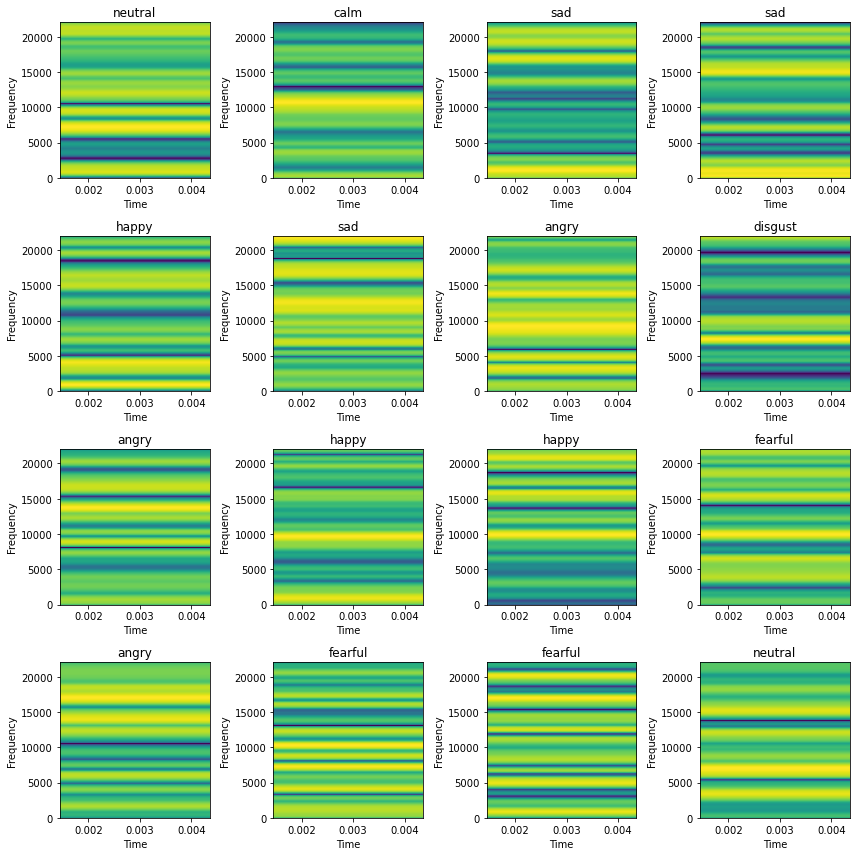

In [36]:
import matplotlib.pyplot as plt
import torch

# Assuming you have a list of 16 tensors
# Replace this with your actual list of tensors
tensor_list = atten_map[-1]

# Create a 4x4 subplot grid
fig, axes = plt.subplots(4, 4, figsize=(12, 12))

# Iterate through the tensors and plot them in subplots
for i, tensor_data in enumerate(tensor_list):
    # Convert the tensor to a numpy array
    data_array = tensor_data.cpu().detach().numpy()

    # Calculate the row and column indices for the subplot grid
    row_index = i // 4
    col_index = i % 4

    # Plot the spectrogram in the current subplot
    axes[row_index, col_index].specgram(data_array.flatten(), Fs=44100)  # Adjust Fs accordingly
    axes[row_index, col_index].set_title(emotion_names[i])
    axes[row_index, col_index].set_xlabel('Time')
    axes[row_index, col_index].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


From the spectrogram plots, plotted above, it can be seen that for 'neutral','angry', the brightness of the horizontal lines (lines colored in 'blue' or 'green' )increases withih the lower frequency range from 0 to 5,000 Hz, but in the higher frequency level those brightness of the lines dimishes for the spectrogram plots. However, in some frequency signal spectrogram plots like 'disgust', the brightness level remains uniform which means the model puts attention uniformly on all the features. However, the authors https://arxiv.org/abs/1806.01506 in this article hat crucial audio features are concentrated in the lower frequency range. Therefore, from attention maps , it is quite evident, that the model focusses correctly only within the lower frequency range for certain emotion attention maps.

###### Checking the Accuracy of the Model on Validation Dataset

In [27]:
# ----------------------------
# Inference
# ----------------------------
def inference (model, val_dl):
  correct_prediction = 0
  total_prediction = 0

  # Disable gradient updates
  with torch.no_grad():
    for data in val_dl:
      # Get the input features and target labels, and put them on the GPU
      inputs, labels = data[0].to(device), data[1].to(device)

      # Normalize the inputs
      inputs_m, inputs_s = inputs.mean(), inputs.std()
      inputs = (inputs - inputs_m) / inputs_s

      # Get predictions
      outputs, atten_map = model(inputs)

      # Get the predicted class with the highest score
      _, prediction = torch.max(outputs,1)
      # Count of predictions that matched the target label
      correct_prediction += (prediction == labels).sum().item()
      total_prediction += prediction.shape[0]

  acc = correct_prediction/total_prediction
  print(f'Accuracy: {acc:.2f}, Total items: {total_prediction}')

###### Loading the bestmodel from the Saved Directory

In [28]:
bestmodel = AudioClassifier()
bestmodel.load_state_dict(torch.load(r'C:\Users\User\9444_WeightDancers_proj\best_model_CNN_multi_attn.pth'))
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
bestmodel = bestmodel.to(device)
# Check that it is on Cuda
next(bestmodel.parameters()).device

device(type='cuda', index=0)

###### Getting the Validation Accuracy of the Model on the Test Data Set

In [29]:
# Run inference on trained model with the validation set
inference(bestmodel, val_dl)

Accuracy: 0.92, Total items: 288


In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

##### Plotting the Confusion Matrix to measure the Performance of the Model on Validation Data Set

<AxesSubplot:title={'center':'Confusion Matrix by CNN+Multihead-Attn'}>

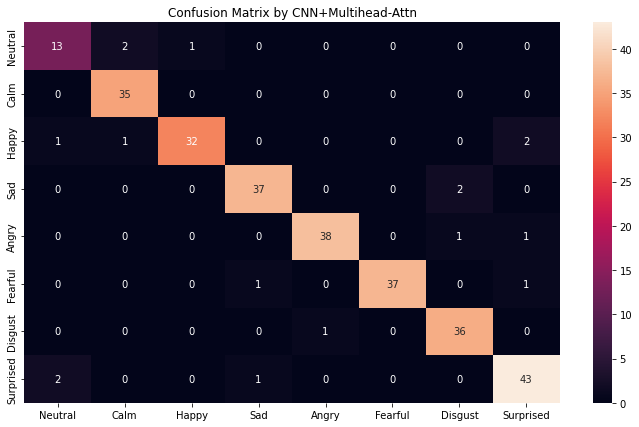

In [31]:
y_pred = []
y_true = []

# iterate over test data

for data in val_dl:
    # Get the input features and target labels, and put them on the GPU
    inputs, labels = data[0].to(device), data[1].to(device)

    # Normalize the inputs
    inputs_m, inputs_s = inputs.mean(), inputs.std()
    inputs = (inputs - inputs_m) / inputs_s

    # Get predictions
    outputs, atten_map = bestmodel(inputs)

    # Get the predicted class with the highest score
    _, prediction = torch.max(outputs,1)
    
    final_pred_cpu = prediction.data.cpu().numpy()
    
    ##Appending the final output data
    y_pred.extend(final_pred_cpu)
    
    labels = labels.data.cpu().numpy()
    
    y_true.extend(labels) # Save Truth


# constant for classes
classes = ('Neutral', 'Calm', 'Happy', 'Sad', 'Angry',
        'Fearful', 'Disgust', 'Surprised')

#01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised
# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
plt.title('Confusion Matrix by CNN+Multihead-Attn')
sn.heatmap(df_cm, annot=True)

<AxesSubplot:title={'center':'Confusion Matrix by CNN+Multihead-Attn, results in probability'}>

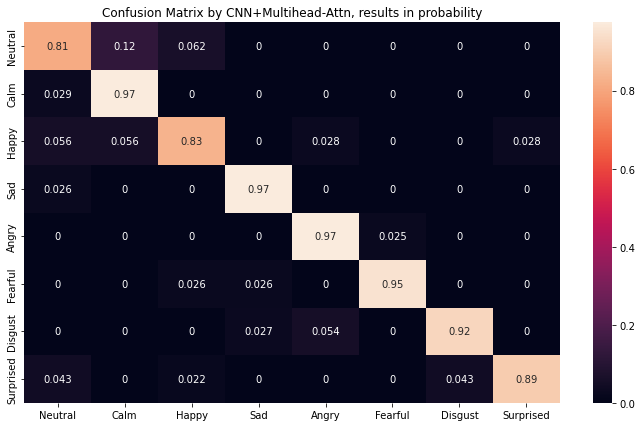

In [33]:
y_pred = []
y_true = []

# iterate over test data

for data in val_dl:
    # Get the input features and target labels, and put them on the GPU
    inputs, labels = data[0].to(device), data[1].to(device)

    # Normalize the inputs
    inputs_m, inputs_s = inputs.mean(), inputs.std()
    inputs = (inputs - inputs_m) / inputs_s

    # Get predictions
    outputs, atten_map = bestmodel(inputs)

    # Get the predicted class with the highest score
    _, prediction = torch.max(outputs,1)
    
    final_pred_cpu = prediction.data.cpu().numpy()
    
    ##Appending the final output data
    y_pred.extend(final_pred_cpu)
    
    labels = labels.data.cpu().numpy()
    
    y_true.extend(labels) # Save Truth



#  classes
classes = ('Neutral', 'Calm', 'Happy', 'Sad', 'Angry',
        'Fearful', 'Disgust', 'Surprised')

#01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised
# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
plt.title('Confusion Matrix by CNN+Multihead-Attn, results in probability')
sn.heatmap(df_cm, annot=True)

In the above, two confusion matrix plots were shown, first matrix plot is based on 'count' i.e. how many number of samples are correctly classified, and the second plot is based on probabaility which measures like out of a particular 'angry' class speech samples, how many of them are correctly classifies to 'angry' class. It is very nice to see that model accurately classifies (the measure of correctly classifying each class is > 90%) the audio samples to 'Calm', 'Sad' , 'Angry', 'Fearful' and 'Disgust' class. However, the Model incorrectly classifies some of the 'Happy' samples to 'Calm' and 'Neutral' Class Category. Also, from the confusion matrix plot, it can also be seen that model incorrectly classifies 'Neutral' to 'Calm' and 'happy'.

##### References Used:-

1. https://ketanhdoshi.github.io/Audio-Classification/

2. https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/

3. https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial6/Transformers_and_MHAttention.html

4. Zhang, Y., Du, J., Wang, Z., Zhang, J. and Tu, Y., 2018, November. Attention based fully convolutional network for speech emotion recognition. In 2018 Asia-Pacific Signal and Information Processing Association Annual Summit and Conference (APSIPA ASC) (pp. 1771-1775). IEEE.